#**LGM VIRTUAL INTERNSHIP PROGRAM 2021**

###**Exploratory Data Analysis - Terrorism**

###**Domain: Data Science**

Author - Vivek B B

## Import libraries and read file data .csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
terrorism = pd.read_csv('Global Terrorism.csv', encoding ='ISO-8859-1', low_memory=False)

In [ ]:
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 135 entries, eventid to related
dtypes: float64(67), int64(17), object(51)
memory usage: 3.0+ MB


In [ ]:
terrorism.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.917000e+03,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2869.000000,2869.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,537.000000,2917.000000,2917.000000,2917.0,2917.000000,14.000000,1.0,2917.000000,2806.000000,2907.000000,60.000000,53.000000,55.000000,2.000000,2.000000,2.00000,0.0,0.0,0.0,2916.000000,4.00,0.0,2916.000000,1024.000000,720.000000,...,0.0,0.0,0.0,0.0,3.0,2916.000000,2542.000000,128.000000,112.000000,8.000000,7.000000,0.0,0.0,0.0,0.0,2610.000000,840.000000,820.00000,1852.000000,827.000000,777.000000,2916.000000,1144.000000,6.030000e+02,2858.000000,220.000000,220.000000,90.000000,83.000000,2774.000000,8.900000e+01,1.0,3.400000e+01,0.0,161.000000,115.000000,2916.000000,2916.000000,2916.000000,2916.000000
mean,1.972192e+11,1972.130614,6.129928,15.420638,0.032225,293.962633,5.128557,35.685756,-35.463317,1.087761,0.004457,0.999314,0.988344,0.876586,-0.692149,1.381750,0.088447,0.880014,0.0,3.150154,4.214286,2.0,6.549194,39.079116,190.802890,9.800000,53.245283,214.090909,4.000000,26.500000,189.00000,NaN,NaN,NaN,0.037723,0.25,NaN,0.003086,-54.823242,-84.883333,...,NaN,NaN,NaN,NaN,0.0,6.432442,12.562549,6.640625,11.544643,7.875000,14.000000,NaN,NaN,NaN,NaN,0.739464,0.177381,0.09878,1.224082,0.440145,0.015444,0.396776,3.227273,1.391239e+05,0.076977,-4.054545,0.272727,-2.055556,22.024096,0.032084,1.531135e+06,20000.0,2.518029e+06,NaN,2.782609,9.852174,-3.229081,-3.145405,0.524005,-1.450274
std,1.588876e+08,1.590787,3.420554,9.111993,0.176627,208.113908,3.509970,24.626973,53.617139,0.562772,0.066621,0.026180,0.107349,0.328969,2.755687,0.583896,0.283993,0.325001,0.0,1.961935,2.516975,NaN,5.545676,27.351195,70.846169,5.965437,25.157890,48.111858,4.242641,26.162951,39.59798,NaN,NaN,NaN,0.190558,0.50,NaN,0.055479,51.717208,34.976173,...,NaN,NaN,NaN,NaN,0.0,1.988620,7.241425,1.893771,7.405730,2.799872,11.224972,NaN,NaN,NaN,NaN,3.215574,1.173084,0.45960,9.024069,2.802150,0.182391,1.446345,0.462892,7.321918e+05,0.266601,46.335551,7.870422,18.663406,42.850556,0.176254,6.758437e+06,NaN,7.441265e+06,NaN,1.283042,35.175561,4.454033,4.529618,0.704633,4.127795
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-43.532054,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,2.0,1.000000,1.000000,5.000000,1.000000,1.000000,30.000000,1.000000,8.000000,161.00000,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,-99.000000,-99.000000,...,NaN,NaN,NaN,NaN,0.0,2.000000,1.000000,2.000000,2.000000,5.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.971020e+11,1971.000000,3.000000,7.000000,0.000000,185.000000,1.000000,34.097866,-75.142561,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,2.000000,2.000000,2.0,2.000000,18.000000,185.000000,3.000000,25.000000,217.000000,2.500000,17.250000,175.00000,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,-99.000000,-99.000000,...,NaN,NaN,N

In [ ]:
terrorism.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999769,-0.045640,0.002690,-0.002609,0.113098,0.363821,-0.006154,0.319560,0.003886,-0.038016,0.002174,-0.057315,-0.027207,-0.080881,-0.243691,-0.115985,0.114859,NaN,-0.233265,-0.040632,NaN,0.094782,0.079198,-0.136324,0.253817,0.333002,-0.168494,-1.0,-1.0,1.0,NaN,NaN,NaN,-0.142814,-0.978612,NaN,0.015386,0.363240,0.090953,...,NaN,NaN,NaN,NaN,NaN,-0.116590,-0.294679,-0.101823,0.219884,-0.466158,-0.140126,NaN,NaN,NaN,NaN,0.083184,0.121295,0.209044,0.097459,0.075739,0.149838,0.085777,0.144192,-0.006672,0.017972,-0.077575,0.095583,-0.049791,0.032557,-0.011084,0.209485,NaN,0.193187,NaN,0.168424,-0.213771,0.254772,0.246667,0.227692,0.386893
iyear,0.999769,1.000000,-0.067089,0.001248,-0.002780,0.110991,0.361447,-0.006001,0.317247,0.004046,-0.037853,0.002151,-0.057352,-0.026854,-0.080912,-0.241703,-0.116671,0.115226,NaN,-0.231099,-0.031519,NaN,0.094918,0.079442,-0.136340,0.252381,0.332660,-0.166310,-1.0,-1.0,1.0,NaN,NaN,NaN,-0.141808,-0.977140,NaN,0.014906,0.363214,0.092621,...,NaN,NaN,NaN,NaN,NaN,-0.115369,-0.292055,-0.102152,0.221502,-0.487116,-0.159394,NaN,NaN,NaN,NaN,0.082851,0.120461,0.208104,0.097263,0.074710,0.149940,0.085470,0.145135,-0.007585,0.017922,-0.075778,0.095356,-0.043633,0.028376,-0.010888,0.205710,NaN,0.185691,NaN,0.165455,-0.213912,0.251797,0.243707,0.224702,0.382842
imonth,-0.045640,-0.067089,1.000000,0.066529,0.007826,0.090338,0.089155,-0.007749,0.088830,-0.008598,-0.008561,0.000995,0.005060,-0.014393,0.006306,-0.071939,0.037943,-0.022990,NaN,-0.087889,-0.339848,NaN,-0.011555,-0.015647,0.005837,0.023512,-0.025754,-0.070077,1.0,1.0,-1.0,NaN,NaN,NaN,-0.040214,-0.050443,NaN,0.017753,0.047229,-0.044218,...,NaN,NaN,NaN,NaN,NaN,-0.046760,-0.108561,0.020758,-0.081362,0.580943,0.539582,NaN,NaN,NaN,NaN,0.012839,0.059054,0.079057,0.010440,0.057669,0.022393,0.009321,-0.055057,0.047156,0.000796,-0.073097,0.002073,-0.276724,0.188330,-0.008898,0.176769,NaN,0.309854,NaN,0.134117,0.012154,0.124617,0.124332,0.126078,0.167983
iday,0.002690,0.001248,0.066529,1.000000,0.011604,0.047434,-0.012071,-0.021514,-0.008085,0.007979,0.021768,0.028523,0.006416,-0.004184,0.019288,-0.078737,0.064999,-0.025450,NaN,-0.064632,0.103645,NaN,0.025213,0.017287,0.006447,-0.053424,-0.073530,-0.044641,-1.0,-1.0,1.0,NaN,NaN,NaN,0.014292,-0.418167,NaN,-0.010004,0.008095,-0.032619,...,NaN,NaN,NaN,NaN,NaN,-0.043192,-0.060317,0.051836,-0.108430,0.124667,0.000000,NaN,NaN,NaN,NaN,0.004066,0.000426,-0.019208,-0.027732,-0.022269,0.003436,-0.019828,-0.005744,-0.013152,-0.002745,0.002352,0.068274,-0.138196,-0.088923,0.000735,0.002365,NaN,0.078063,NaN,0.079504,-0.090077,0.065111,0.063681,0.028671,0.059280
extended,-0.002609,-0.002780,0.007826,0.011604,1.000000,-0.166031,0.006038,-0.201987,0.019893,0.099190,-0.012209,0.004780,0.019816,0.038959,-0.039412,-0.063442,-0.022657,0.061406,NaN,0.229480,0.318550,NaN,-0.049234,-0.036813,-0.038559,0.091745,0.187629,-0.200270,NaN,NaN,NaN,NaN,NaN,NaN,-0.036136,NaN,NaN,-0.010155,0.310053,0.054184,...,NaN,NaN,NaN,NaN,NaN,0.434893,-0.101704,-0.002139,0.017130,0.018039,0.353553,NaN,NaN,NaN,NaN,-0.007985,0.260725,0.089519,-0.014218,0.177742,0.154098,-0.029937,-0.029040,0.164566,0.638588,0.271331,0.009787,0.306822,0.191387,0.553813,-0.119802,

In [ ]:
terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Collect useful columns for our analysis. We kept 20 out of 153 columns from the original data

In [ ]:
terrorism.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

#Keep 20 columns
data = terrorism[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Eventid      2917 non-null   float64
 1   Year         2917 non-null   int64  
 2   Country      2917 non-null   object 
 3   Region       2917 non-null   object 
 4   Provstate    2907 non-null   object 
 5   City         2917 non-null   object 
 6   Crit1        2917 non-null   int64  
 7   Crit2        2917 non-null   int64  
 8   Crit3        2917 non-null   int64  
 9   Success      2917 non-null   int64  
 10  Suicide      2917 non-null   int64  
 11  Attacktype   2917 non-null   object 
 12  Targtype     2917 non-null   object 
 13  Natlty1      2907 non-null   object 
 14  Gname        2916 non-null   object 
 15  Guncertain1  2916 non-null   float64
 16  Claimed      725 non-null    float64
 17  Weaptype     2916 non-null   object 
 18  Nkill        2610 non-null   float64
 19  Nwound

In [ ]:
#SOME INFO FIRST
print('Country with the highest number of Terrorist Attacks:',data['Country'].value_counts().index[0])
print('Regions with the highest number of  Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum number of people were killed by a single terrorist attack are',data['Nkill'].max(),'people that took place in',data.loc[data['Nkill'].idxmax()].Country)

Country with the highest number of Terrorist Attacks: United States
Regions with the highest number of  Terrorist Attacks: Western Europe
Maximum number of people were killed by a single terrorist attack are 88.0 people that took place in Greece


In [ ]:
#Add column Damage (Number of Dead/Injured people) by adding Nkill and Nwound
data['Damage']=data['Nkill']+data['Nwound']


#Change some long words inside the dataset
data['Country'] = data['Country'].replace('South Vietnam','Vietnam', regex=True)
data['Weaptype'] = data['Weaptype'].replace('Vehicle .*','Vehicle', regex=True)
data['Attacktype'] = data['Attacktype'].replace('Hostage Taking .*','Hostage Taking', regex=True)

### Comparing the number of Terrorist Attacks and the number of Dead/Injured people from 1970 to 2017

In [ ]:
#Filter Data to choose Number Of Dead/Injured People In Terrorist Attacks From 1970 to 2017
people_damage = data[["Year","Damage"]].groupby('Year').sum()
list_year =  data["Year"].unique().tolist()

#draw bar chart
fig, ax1 = plt.subplots(figsize = (18,5))
ax1.bar(people_damage.index, [i[0] for i in people_damage.values], color= '#0063B1' )
ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)
ax1.set_ylabel('Number Of Dead/Injured People', size = 12)
ax1.set_xlabel('Year', size = 12)
ax1.set_title('Number of Terrorist Attacks vs Number of Dead/Injured people From 1970 to 2017', fontsize= 15, pad= 10, weight ='bold', 
                    color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
ax2 = ax1.twinx()

#Filter & get a number of attacked in the world from 1970 to 2017 
number_attack = []
for year in list_year:
    number_attack.append(len(data[data['Year'] == year][["Year"]]))
number_attack.insert(23, 0)


#draw plot chart
ax2.set_ylabel('Number Of Terrorist Attacks', size = 12,rotation=-90)
ax2.plot(range(1970, 2018), number_attack, 'r--o', mfc='k', label='Number Of Terrorist Attacks')
plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()

### Analyse the Terrorist attack types and Damage

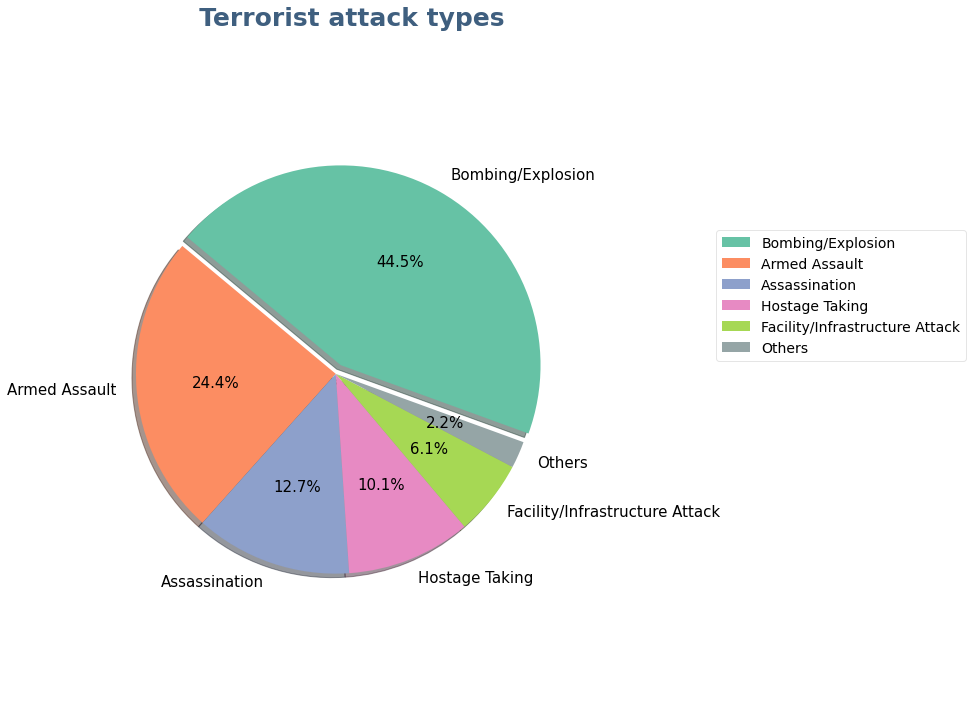

In [ ]:
atk_filtered =data['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack'] else 'Others')
attack_type = atk_filtered.value_counts().tolist()

# Pie chart of Terrorist attack types
labels = ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack','Others']
sizes = []

for i in attack_type:
    percent = i*100/len(data['Attacktype'])
    sizes.append(percent)
fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:5]+[(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})
ax.axis('equal')
plt.title('   Terrorist attack types', fontsize= 25, pad= -70, weight ='bold',color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 
plt.tight_layout()
ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.8,0.5,0.1,1), prop={'size': 14})
fig.show()



In [ ]:
# Create table_1 about Attack types and number of Dead/Injured People
cat = ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack']
color_cat = sns.color_palette("Set2", 8)[:5]
color_cat_dict = dict(zip(cat, color_cat))
table_1 = data[['Attacktype','Damage']].groupby('Attacktype',as_index = False).sum().sort_values(by='Damage', ascending=False)
table_1 = table_1.reset_index()
inci = [88255,42669,7276,19312,12149,659,1015,10356]
table_1["Incidents"] = np.array(inci)
table_1["Damage_rate"] = table_1["Damage"]/table_1["Incidents"]
table_1

,index,Attacktype,Damage,Incidents,Damage_rate
0,2,Bombing/Explosion,2402.0,88255,0.027217
1,1,Assassination,192.0,42669,0.004500
2,0,Armed Assault,185.0,7276,0.025426
3,5,Hostage Taking,134.0,19312,0.006939
4,3,Facility/Infrastructure Attack,90.0,12149,0.007408
5,7,Unknown,24.0,659,0.036419
6,4,Hijacking,20.0,1015,0.019704
7,6,Unarmed Assault,6.0,10356,0.000579


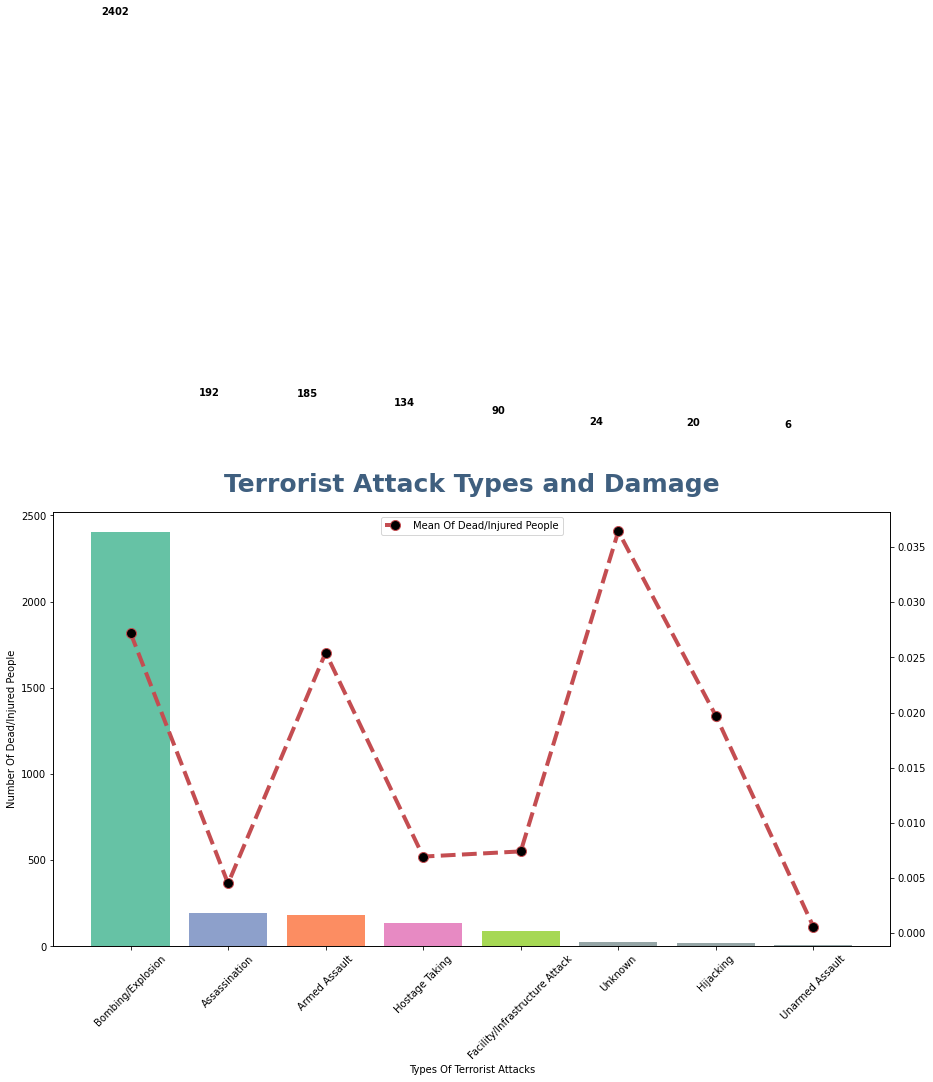

In [ ]:
# Draw chart of Terrorist Attack Types and the Damage
labels = table_1['Attacktype'].tolist()
x = np.arange(len(labels)) 
dmg = table_1['Damage'].tolist()
gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
color_list = [color_cat_dict[ter_type] if ter_type in color_cat_dict.keys() else gray for ter_type in labels]
d_rate = table_1["Damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar chart
ax1.bar(labels, dmg,color = color_list,align='center')

# Number in bar chart
for i,v in enumerate(dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')

# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(labels, d_rate, linestyle='--', linewidth =4, marker ='o', 
         markerfacecolor='black', markersize =10,
         label='Mean Of Dead/Injured People',
         color = '#C44D51')

plt.title('Terrorist Attack Types and Damage', fontsize= 25, pad= 20, weight ='bold', color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 
ax1.set(xlabel='Types Of Terrorist Attacks', ylabel='Number Of Dead/Injured People')
ax1.set_xticklabels(labels, rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center') 
fig.show()

### Analyse the Weapon types and Damage

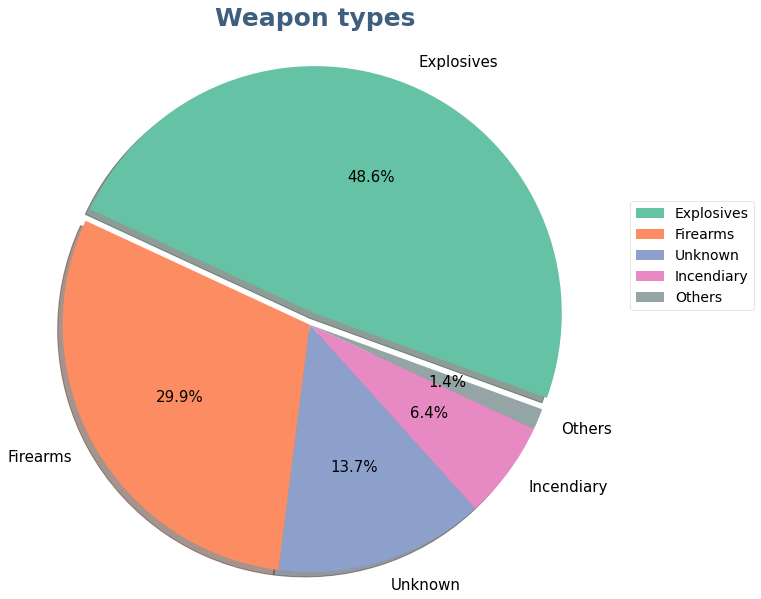

In [ ]:
weaptype_filtered =data['Weaptype'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown','Incendiary'] else 'Others')
weaptype = weaptype_filtered.value_counts().tolist()

# Pie chart of weapons types
weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']
weap_sizes = []

for j in weaptype:
    percent = j*100/len(data['Weaptype'])
    weap_sizes.append(percent)
fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(weap_sizes, labels=weap_labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:4:1]+[(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})
ax.axis('equal')
plt.title('Weapon types', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 
ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.2,0.5,0.1,1), prop={'size': 14})
fig.show()

In [ ]:
# Create table_2 about Weapon types and number of Dead/Injured People
table_2 = data[['Weaptype','Damage']].groupby('Weaptype',as_index = False).sum().sort_values(by='Damage', ascending=False)
df_count = data['Weaptype'].value_counts()
df_count = df_count.reindex(table_2['Weaptype'].values)
table_2['WeapCount'] = df_count.values
table_2["Weap_damage_rate"] = table_2["Damage"]/table_2["WeapCount"]
table_2

,Weaptype,Damage,WeapCount,Weap_damage_rate
1,Explosives,2202.0,1419,1.551797
3,Firearms,642.0,872,0.736239
4,Incendiary,90.0,399,0.225564
8,Unknown,81.0,187,0.433155
9,Vehicle,24.0,1,24.000000
5,Melee,13.0,22,0.590909
0,Chemical,1.0,12,0.083333
2,Fake Weapons,0.0,2,0.000000
6,Radiological,0.0,1,0.000000
7,Sabotage Equipment,0.0,1,0.000000


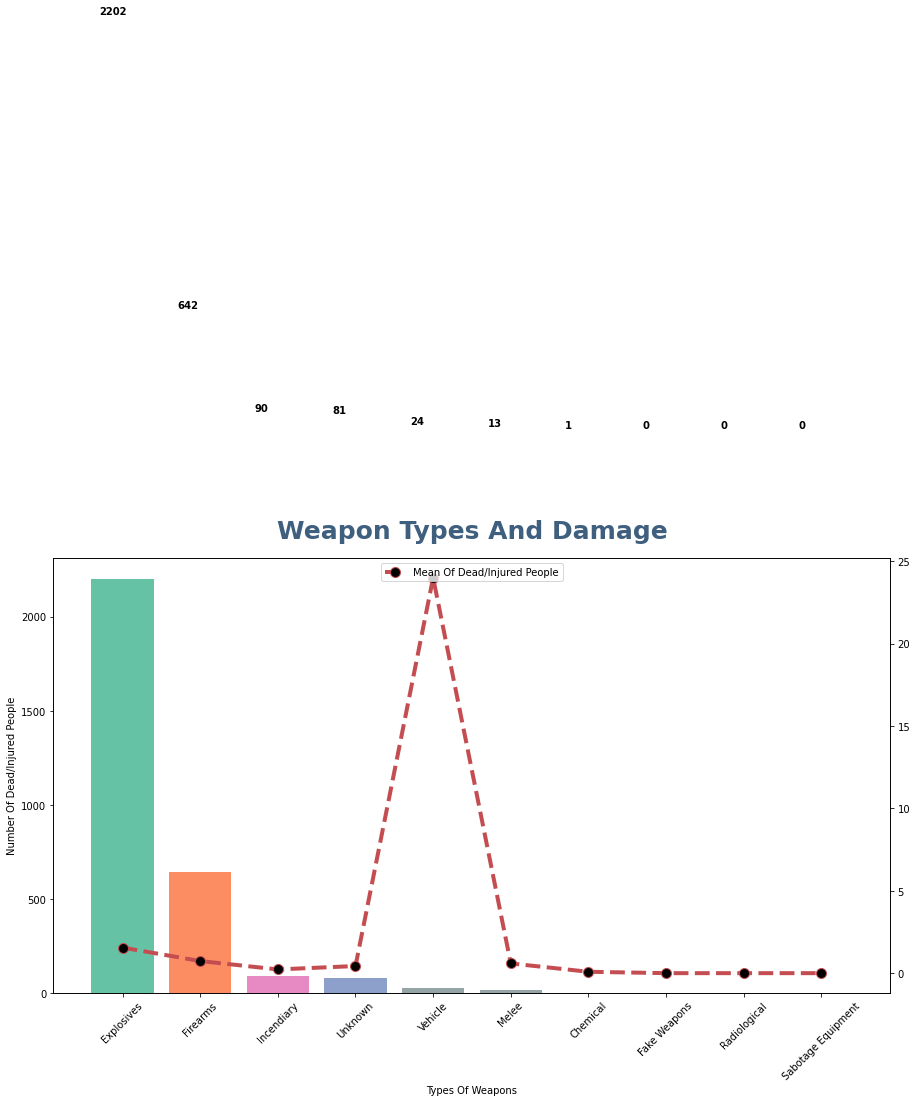

In [ ]:
# Set same color with previous pie chart
weap_labels = table_2['Weaptype'].tolist()
y = np.arange(len(weap_labels)) 
weap_dmg = table_2['Damage'].tolist()
w_cat = ['Explosives','Firearms','Unknown','Incendiary']
w_color_cat = sns.color_palette("Set2", 8)[:4:1]
w_color_cat_dict = dict(zip(w_cat, w_color_cat))
w_gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
w_color_list = [w_color_cat_dict[ter_type] 
                if ter_type in w_color_cat_dict.keys() 
                else w_gray for ter_type in weap_labels]
w_rate = table_2["Weap_damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar chart
ax1.bar(weap_labels, weap_dmg,
       color = w_color_list,
       align='center')

# Number in bar chart
for i,v in enumerate(weap_dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')

# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(weap_labels, w_rate, linestyle='--', linewidth =4, marker ='o', 
         markerfacecolor='black', markersize =10,
         label='Mean Of Dead/Injured People',
         color = '#C44D51')
plt.title('Weapon Types And Damage', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 
ax1.set(xlabel='Types Of Weapons', ylabel='Number Of Dead/Injured People')
ax1.set_xticklabels(weap_labels, rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center') 
fig.show()

### Top 10 countries with the highest Number of Dead/Injured people in the world from 2000 to 2017

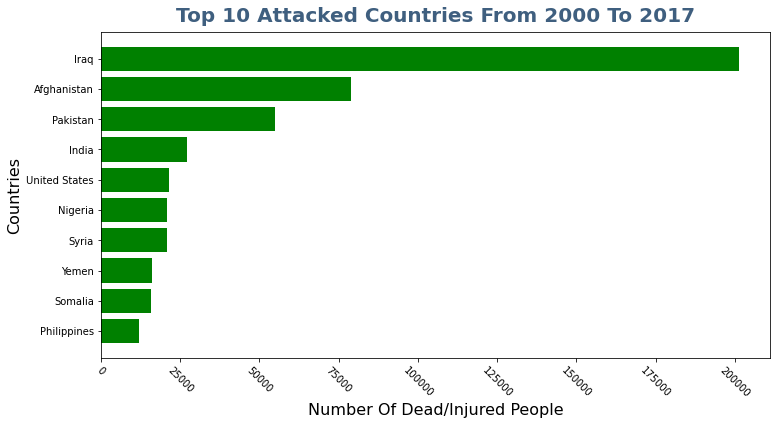

In [ ]:
#Choose comlumn Country and Damage from data
country_damage = data[data['Year'] > 1999][["Country", "Damage"]].groupby('Country',as_index=False).sum()
data_paint = country_damage.sort_values(by='Damage', ascending = False).head(10)

#Paint the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(data_paint["Country"][::-1], data_paint["Damage"][::-1], color = 'green')
plt.xticks(rotation=-45)
ax.set_ylabel('Countries', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 10 Attacked Countries From 2000 To 2017", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()

### Top 10 targeted nationalities with the highest number of Dead/Injured People from 2000 to 2017

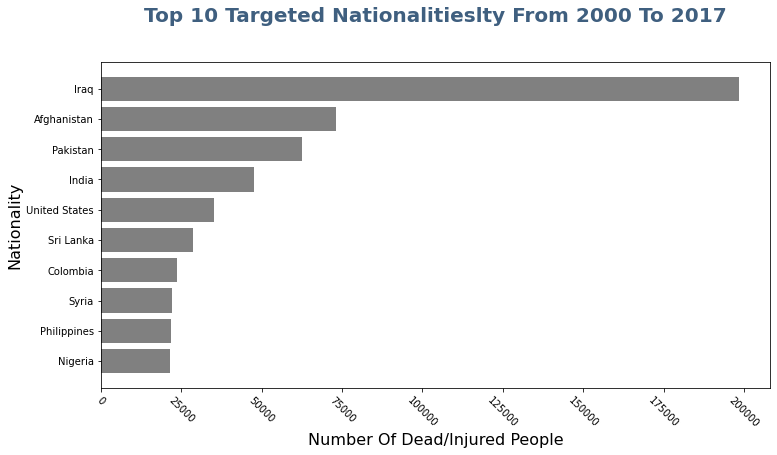

In [ ]:
#Choose comlumn Country and Damage from data
nalty_damage = data[["Natlty1", "Damage"]].groupby('Natlty1', as_index=False).sum()
data_paint_natlty = nalty_damage.sort_values(by='Damage', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(12, 6))

#Paint bar chart
ax.barh(data_paint_natlty["Natlty1"][::-1], data_paint_natlty["Damage"][::-1], color = 'gray')
plt.xticks(rotation=-45)
ax.set_ylabel('Nationality', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 10 Targeted Nationalitieslty From 2000 To 2017", fontsize= 20, pad= 40, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()

### Identify the safest countries from 2000 to 2017 which has 0 dead/injured people caused by Terrorist Attacks

In [ ]:
#Filter from dataframe country_damage
country_damage[country_damage["Damage"]==0]

,Country,Damage
9,Bahamas,0.0
14,Belize,0.0
34,Cyprus,0.0
64,Iceland,0.0
105,New Zealand,0.0
117,Portugal,0.0
129,Slovenia,0.0
139,Swaziland,0.0
147,Togo,0.0
160,Vietnam,0.0


### Function show both Top 10 Attacked Countries and Top 10 Targeted Nationalities charts

In [ ]:
def country_nationality(n):

    #Filter data and choose Top 10 Attacked Countries
    top10_bad = data[data['Year'] == n][["Country", "Damage"]].groupby('Country',as_index=False).sum()
    data_paint = top10_bad.sort_values(by='Damage', ascending = False).head(10)

    #Paint bar chart
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    ax[0].barh(data_paint["Country"][::-1], data_paint["Damage"][::-1], color = ['red', 'blue', 'green', '#34465D', '#df2029', '#FFFC00', '#E4405F', '#3B5999', '#00c300', '#ff0084'])
    ax[0].set_ylabel('Countries', size=16)
    ax[0].set_xlabel('Number Of Dead/Injured People', size=16)
    ax[0].set_title("Top 10 Attacked Countries %d" % n, fontsize= 15, pad= 10, weight ='bold', 
                  color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
    plt.subplots_adjust(wspace=0.3)
    #Filter data and choose Top 10 Targeted Nationalities    
    nalty_damage = data[["Natlty1", "Damage"]].groupby('Natlty1', as_index=False).sum()
    data_paint_natlty = nalty_damage.sort_values(by='Damage', ascending = False).head(10)

    #Paint bar chart
    ax[1].barh(data_paint_natlty["Natlty1"][::-1], data_paint["Damage"][::-1], color = ['red', 'blue', 'green', '#34465D', '#df2029', '#131418', '#AF0606', '#0084ff', '#ff6600', '#410093'])
    ax[1].set_xlabel('Number Of Dead/Injured People',size=16)
    ax[1].set_ylabel('Nationalities', size=16)
    ax[1].set_title("Top 10 Targeted Nationalities %d" % n, fontsize= 15, pad= 10, weight ='bold', 
                  color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
    for ax in fig.axes:
        plt.sca(ax)
    plt.show()

### Time-series Top 10 Attacked Countries and Top 10 Targeted Nationalities

In [ ]:
list_year = []
for year in range(1970,1993): list_year.append(year)
for year in range(1994,2018): list_year.append(year)

for year in list_year:
    country_nationality(year)
    time.sleep(2)
    clear_output()

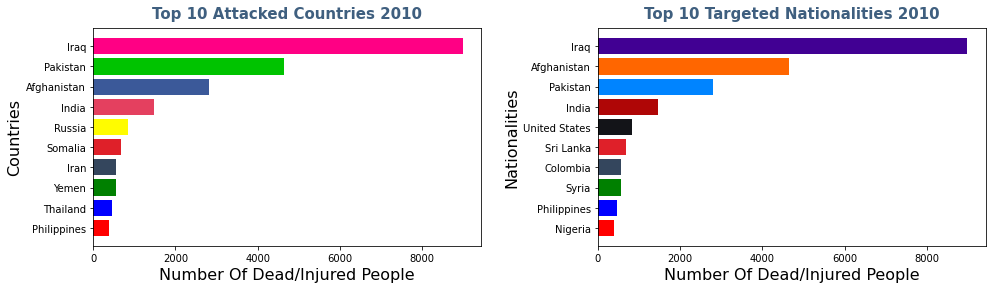

In [ ]:
country_nationality(2010)

### Draw chart of Top 10 Attacked Countries and Top 10 Targeted Nationalities with the specific year input

Input the Year you want to see chart! (1970 -2017): 2000


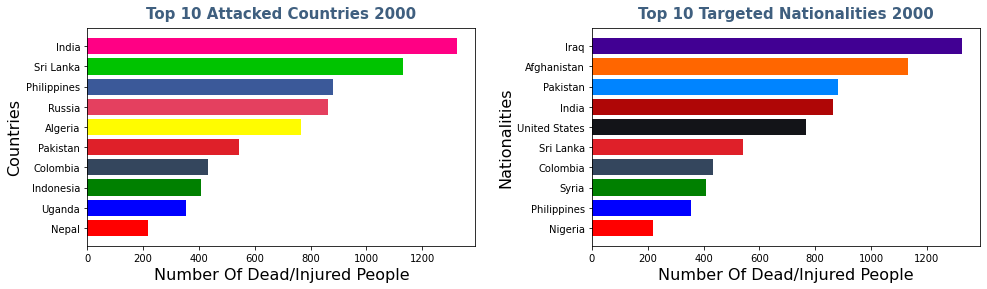

In [ ]:
def country_nationality_year():
    """
    Function to paint chart with specific input year
    """

  # Input year. Try if it in list_year
    try:
        year = int(input ('Input the Year you want to see chart! (1970 -2017): '))
        if year == 1993:
            print('Sorry, No Terrorism Data in 1993')
            year = int(input ('Input the Year you want to see chart! (1970 -2017): '))
        while year not in list_year:
            print("Please Input the year from 1970 to 2017")
            year = int(input('Input the Year you want to see chart! (1970 -2017): '))

  #When have error, print error and call function timseri_year
    except (ValueError, ZeroDivisionError) as ex:  # Called when have error typing
        print("Wrong type, input again: ")
        country_nationality_year()

  #when don't have error: 
    else:
       #print chart with function timeseri(year)
        country_nationality(year)
country_nationality_year()